# Which genres are the most popular?

Popularity can be determined in many ways.  In this analysis, we will look at how popular a movie genre is to produce, as evidence by how many movies of each genre are made.  Then we will also look at how popular a movie genre is to consumers, based on the TheMovieDataBase popularity score.

## Data Cleaning tmdb_movies_df

### **Data cleaning overview:**

* No null values.
* Remove 1020 duplicates.
* Drop 1st column
* Check genre_ids for missing values (2461) and replace with 0
* Create genre_list column with genre names instead of ids
* Create 18 new dummy variable columns to represent each value of genre_id and populate with 0 or 1

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
tmdb_movies_df = pd.read_csv('../zippedData/tmdb.movies.csv.gz')
print(len(tmdb_movies_df))
tmdb_movies_df.head()

26517


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
tmdb_movies_df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
# check for duplicates
tmdb_dups = tmdb_movies_df[tmdb_movies_df.duplicated(subset=['title'])]
tmdb_dups

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
781,781,"[18, 28, 53]",51462,en,Brotherhood,2.235,2010-01-03,Brotherhood,6.2,31
1037,1037,"[35, 18, 10749]",44369,tl,Boy,1.504,2009-06-01,Boy,7.5,2
1230,1230,[],371702,en,All That Glitters,1.241,2010-09-25,All That Glitters,10.0,1
1501,1501,"[28, 18]",36410,en,Zero,0.840,2010-02-06,Zero,5.8,6
1708,1708,"[9648, 18, 14]",325303,en,Umkhungo,0.624,2010-01-01,The Gift,9.0,1
...,...,...,...,...,...,...,...,...,...,...
26495,26495,[],556601,en,Recursion,0.600,2018-08-28,Recursion,2.0,1
26504,26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26506,26506,[],561861,en,Eden,0.600,2018-11-25,Eden,0.0,1
26510,26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [5]:
#  There are 1829 duplicates on the title.  Let's examine one more closely.

tmdb_movies_df[tmdb_movies_df.title =='Eden']

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
5493,5493,[18],96599,en,Eden,6.877,2012-03-11,Eden,6.8,100
11604,11604,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
13854,13854,[],446332,en,Eden,0.600,2014-10-04,Eden,5.0,2
14748,14748,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
14989,14989,"[53, 18]",360339,en,Eden,3.061,2015-09-18,Eden,5.4,29
18019,18019,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
26506,26506,[],561861,en,Eden,0.600,2018-11-25,Eden,0.0,1


In [6]:
# Of these 7 duplicates, we can see that 3 have the same value for 'id', as well as other values.
# Perhaps we should use the id to determine which rows can be dropped.

tmdb_dups = tmdb_movies_df[tmdb_movies_df.duplicated(subset=['id'])]
tmdb_dups

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...,...
26481,26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [7]:
# Only 1020 duplicates now. Out of curiosity, how many are duplicates of duplicates? Answer = 24.
tmdb_dups[tmdb_dups.duplicated(subset=['id'])]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
11915,11915,[99],220494,en,Bettie Page Reveals All,2.645,2013-11-22,Bettie Page Reveals All,7.1,18
13507,13507,[18],192137,en,Not Waving but Drowning,0.600,2012-09-09,Not Waving but Drowning,7.3,4
13675,13675,[18],91311,en,The Trouble with the Truth,0.600,2011-10-21,The Trouble with the Truth,6.3,4
15112,15112,"[27, 53]",192023,en,The Invoking,2.481,2013-03-16,The Invoking,4.1,14
15273,15273,"[18, 878]",121803,en,41,2.004,2013-08-09,41,6.4,12
16253,16253,[99],70758,en,"Hey, Boo: Harper Lee & To Kill a Mockingbird",0.685,2011-05-13,"Hey, Boo: Harper Lee & To Kill a Mockingbird",8.0,3
17547,17547,"[12, 14]",11976,en,Legend,10.542,1986-04-18,Legend,6.2,509
17836,17836,"[35, 18]",228108,en,The Road Within,6.838,2015-04-21,The Road Within,6.8,218
17896,17896,"[53, 16, 14]",152044,ja,劇場版 魔法少女まどか☆マギカ[後編] 永遠の物語,6.393,2012-10-19,Puella Magi Madoka Magica the Movie Part II: E...,8.0,53
18019,18019,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57


In [8]:
# Lets remove the 1020 duplicates on id.  We now have 25497 records.
tmdb_movies_df.drop_duplicates(subset=['id'],inplace = True)
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           25497 non-null int64
genre_ids            25497 non-null object
id                   25497 non-null int64
original_language    25497 non-null object
original_title       25497 non-null object
popularity           25497 non-null float64
release_date         25497 non-null object
title                25497 non-null object
vote_average         25497 non-null float64
vote_count           25497 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [9]:
# Now that we have deleted the duplicates, let's reset the index for ease of iteration.
tmdb_movies_df.reset_index(drop=True, inplace=True)
tmdb_movies_df.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
25492,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
25493,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
25494,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
25495,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
25496,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [10]:
# The first column is an unnecessary index. Preview (for safety) dropping first column.
tmdb_movies_df.drop(columns='Unnamed: 0')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
25492,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
25493,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
25494,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
25495,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [11]:
# Looks good.  Drop first column.
tmdb_movies_df.drop(columns='Unnamed: 0', inplace=True)
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
#  Since we would like to study the genres, check for missing values in genre_ids.

tmdb_movies_df.genre_ids.value_counts()

[99]                        3565
[]                          2461
[18]                        2119
[35]                        1622
[27]                        1125
                            ... 
[80, 53, 27]                   1
[80, 18, 28, 53, 878]          1
[28, 16, 14, 878, 53]          1
[99, 36, 10751]                1
[14, 35, 16, 878, 10751]       1
Name: genre_ids, Length: 2477, dtype: int64

In [13]:
#  It looks like 2479 movies have no genre_id listed. Let's look at them. 

tmdb_movies_df[tmdb_movies_df['genre_ids'] == '[]']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
517,[],31059,ru,Наша Russia: Яйца судьбы,3.867,2010-01-21,Nasha Russia: Yaytsa sudby,4.3,25
559,[],151316,en,Shrek’s Yule Log,3.424,2010-12-07,Shrek’s Yule Log,4.7,9
589,[],75828,en,Erratum,3.154,2010-09-16,Erratum,6.6,7
689,[],150782,en,Bikini Frankenstein,2.625,2010-01-18,Bikini Frankenstein,6.0,4
731,[],200946,en,Weakness,2.451,2010-10-24,Weakness,4.5,2
...,...,...,...,...,...,...,...,...,...
25478,[],556601,en,Recursion,0.600,2018-08-28,Recursion,2.0,1
25480,[],514045,en,The Portuguese Kid,0.600,2018-02-14,The Portuguese Kid,2.0,1
25481,[],497839,en,The 23rd Annual Critics' Choice Awards,0.600,2018-01-11,The 23rd Annual Critics' Choice Awards,2.0,1
25483,[],561932,en,Two,0.600,2018-02-04,Two,1.0,1


In [14]:
# Rather than lose all of this data, I will set the missing genre_id fields to a list of 0.
tmdb_movies_df.loc[tmdb_movies_df['genre_ids'] == tmdb_movies_df.genre_ids.iloc[517],'genre_ids'] = list('0')


In [15]:
# Check value counts again.

tmdb_movies_df.genre_ids.value_counts()

[99]                        3565
0                           2461
[18]                        2119
[35]                        1622
[27]                        1125
                            ... 
[80, 53, 27]                   1
[80, 18, 28, 53, 878]          1
[28, 16, 14, 878, 53]          1
[99, 36, 10751]                1
[14, 35, 16, 878, 10751]       1
Name: genre_ids, Length: 2477, dtype: int64

In [16]:
# I would prefer to see genre names rather than ids.  Loop through the list of genre_ids for each movie
# and create a new column with a list of genre names.
genre_dict = {"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}

series_genre_list=[]
for movie in range(len(tmdb_movies_df)):
    genre_list=[]
    for i in tmdb_movies_df.genre_ids[movie].strip("[]").split(', '):
        if int(i) == 0:
            genre_list.append('none')
            break  
        genre_list.append({d['id']:d['name'] for d in genre_dict["genres"]}[int(i)])
    series_genre_list.append(genre_list)

tmdb_movies_df['genre_list'] = pd.Series(series_genre_list, index=tmdb_movies_df.index)
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_list
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


In [17]:
# Let's also create dummy variable columns for each individual genre since most movies seem to have more than one and
# we may want to look at them individually.

# Create function to parse out genre-ids into separate columns and add values of either 0 or 1

def create_dummy_column(column_id):
    list=[]
    for movie in range(len(tmdb_movies_df)):
        result=None
        for i in tmdb_movies_df.genre_ids[movie].strip("[]").split(', '):
            if int(i) == column_id:
                result = 1
        if result == 1:
            list.append(result)
        else:
            list.append(0)
    return list

In [18]:
# Add columns to dataframe.  I'm sure there is a nicer way to loop this, but it works for now.

tmdb_movies_df['action'] = pd.Series(create_dummy_column(28), index=tmdb_movies_df.index)
tmdb_movies_df['adventure'] = pd.Series(create_dummy_column(12), index=tmdb_movies_df.index)
tmdb_movies_df['animation'] = pd.Series(create_dummy_column(16), index=tmdb_movies_df.index)
tmdb_movies_df['comedy'] = pd.Series(create_dummy_column(35), index=tmdb_movies_df.index)
tmdb_movies_df['crime'] = pd.Series(create_dummy_column(80), index=tmdb_movies_df.index)
tmdb_movies_df['documentary'] = pd.Series(create_dummy_column(99), index=tmdb_movies_df.index)
tmdb_movies_df['drama'] = pd.Series(create_dummy_column(18), index=tmdb_movies_df.index)
tmdb_movies_df['family'] = pd.Series(create_dummy_column(10751), index=tmdb_movies_df.index)
tmdb_movies_df['fantasy'] = pd.Series(create_dummy_column(14), index=tmdb_movies_df.index)
tmdb_movies_df['history'] = pd.Series(create_dummy_column(36), index=tmdb_movies_df.index)
tmdb_movies_df['horror'] = pd.Series(create_dummy_column(27), index=tmdb_movies_df.index)
tmdb_movies_df['music'] = pd.Series(create_dummy_column(10402), index=tmdb_movies_df.index)
tmdb_movies_df['mystery'] = pd.Series(create_dummy_column(9648), index=tmdb_movies_df.index)
tmdb_movies_df['romance'] = pd.Series(create_dummy_column(10749), index=tmdb_movies_df.index)
tmdb_movies_df['scifi'] = pd.Series(create_dummy_column(878), index=tmdb_movies_df.index)
tmdb_movies_df['TV_movie'] = pd.Series(create_dummy_column(10770), index=tmdb_movies_df.index)
tmdb_movies_df['thriller'] = pd.Series(create_dummy_column(53), index=tmdb_movies_df.index)
tmdb_movies_df['war'] = pd.Series(create_dummy_column(10752), index=tmdb_movies_df.index)
tmdb_movies_df['western'] = pd.Series(create_dummy_column(37), index=tmdb_movies_df.index)

tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_list,...,history,horror,music,mystery,romance,scifi,TV_movie,thriller,war,western
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]",...,0,0,0,0,0,0,0,0,0,0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]",...,0,0,0,0,0,0,0,0,0,0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]",...,0,0,0,0,0,1,0,0,0,0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]",...,0,0,0,0,0,0,0,0,0,0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]",...,0,0,0,0,0,1,0,0,0,0


In [19]:
tmdb_movies_df.describe()

,id,popularity,vote_average,vote_count,action,adventure,animation,comedy,crime,documentary,...,history,horror,music,mystery,romance,scifi,TV_movie,thriller,war,western
count,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,...,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780,0.099384,0.052320,0.056320,0.213005,0.055732,0.187159,...,0.022277,0.139036,0.048202,0.045849,0.087187,0.066165,0.041848,0.156411,0.012472,0.007570
std,154690.249660,4.261045,1.866094,914.150311,0.299183,0.222676,0.230544,0.409439,0.229408,0.390047,...,0.147586,0.345991,0.214196,0.209161,0.282114,0.248575,0.200246,0.363251,0.110982,0.086675
min,27.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154770.000000,0.600000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307125.000000,1.321000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,420707.000000,3.490000,7.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,608444.000000,80.773000,10.000000,22186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Data cleaning details:**

* No null values.
* Remove 1020 duplicates.
* Drop 1st column
* Check genre_ids for missing values (2461) and replace with 0
* Create genre_list column with genre names instead of ids
* Create 18 new dummy variable columns to represent each value of genre_id and populate with 0 or 1


In [20]:
# I think the data is clean now and ready for some analysis.  Let's save it to a .csv file and then read it back in.

tmdb_movies_df.to_csv('../cleanedData/clean_tmdb_movies_df.csv')

clean_tmdb_movies_df = pd.read_csv('../cleanedData/clean_tmdb_movies_df.csv',index_col=[0])
print(len(clean_tmdb_movies_df))

25497


## Exploratory Data Analysis - clean_tmdb_movies_df

### **EDA overview:**

We will answer the question of which genres are most popular by establishing a rank order of how many movies are in each genre as well as calculating the percentage of movies with the given genre attribute, since many movies have multiple genres.  We will then calculate each genres average popularity according to the TMDB popularity score given to each movie in the category.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [22]:
#  Here is our clean data.  How will we answer the question of which genres are the most popular?
clean_tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_list,...,history,horror,music,mystery,romance,scifi,TV_movie,thriller,war,western
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"['Adventure', 'Fantasy', 'Family']",...,0,0,0,0,0,0,0,0,0,0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"['Fantasy', 'Adventure', 'Animation', 'Family']",...,0,0,0,0,0,0,0,0,0,0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"['Adventure', 'Action', 'Science Fiction']",...,0,0,0,0,0,1,0,0,0,0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"['Animation', 'Comedy', 'Family']",...,0,0,0,0,0,0,0,0,0,0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"['Action', 'Science Fiction', 'Adventure']",...,0,0,0,0,0,1,0,0,0,0


In [23]:
#  Looking at a summation of the columns tells us how many of the movies are associated with each genre.
clean_tmdb_movies_df.sum()

genre_ids            [12, 14, 10751][14, 12, 16, 10751][12, 28, 878...
id                                                          7501318381
original_language    enenenenenenenenenenenenenenenenennlenenenenen...
original_title       Harry Potter and the Deathly Hallows: Part 1Ho...
popularity                                                     77594.5
release_date         2010-11-192010-03-262010-05-071995-11-222010-0...
title                Harry Potter and the Deathly Hallows: Part 1Ho...
vote_average                                                    152455
vote_count                                                     4558756
genre_list           ['Adventure', 'Fantasy', 'Family']['Fantasy', ...
action                                                            2534
adventure                                                         1334
animation                                                         1436
comedy                                                            5431
crime 

In [24]:
#  To rank order how many movies are in each genre, we need a data set with genre names and counts.  Also a percentage value
#  indicating how many of the movies in our database have that genre would be nice.
genres = pd.Series(clean_tmdb_movies_df.columns[10:])
counts=[]
for genre in genres:
     counts.append(clean_tmdb_movies_df[genre].sum())
count_data = pd.Series(counts)
genre_counts = (pd.concat([genres,count_data], axis=1))
genre_counts.columns = ['genre','count']
genre_counts['percent'] = genre_counts['count'].apply(lambda x: x/len(clean_tmdb_movies_df))
sorted_genre_counts = genre_counts.sort_values('count', ascending=False)
sorted_genre_counts.reset_index(drop=True,inplace=True)
sorted_genre_counts

,genre,count,percent
0,drama,7761,0.304389
1,comedy,5431,0.213005
2,documentary,4772,0.187159
3,thriller,3988,0.156411
4,horror,3545,0.139036
5,action,2534,0.099384
6,romance,2223,0.087187
7,scifi,1687,0.066165
8,family,1523,0.059733
9,animation,1436,0.056320


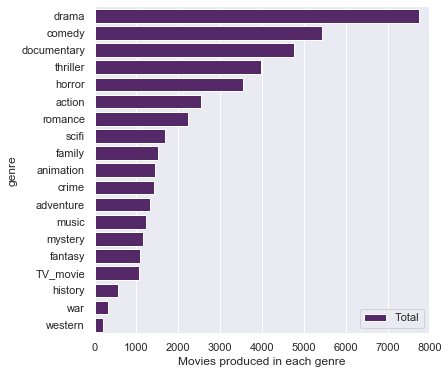

In [25]:
#  Well we see that 30% of the movies fall in the drama category, so they are quite popular to produce.  Note that our 
#  percentages do add up to more than 100% because movies can have multiple genres.  Let's look at a data visualization.

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes("dark")
sns.barplot(x="count", y="genre", data=sorted_genre_counts,
            label="Total", color="m")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 8000), ylabel="genre",
       xlabel="Movies produced in each genre")
sns.despine(left=True, bottom=True)


In [26]:
# Let's analyze which movies are most popular, not to produce, but according to the TheMovieDB attribute of popular.  This is
# calculated as an algorithm including: Number of votes for the day, Number of views for the day, Number of users who marked 
# it as a "favourite" for the day, Number of users who added it to their "watchlist" for the day, Release date, Number of 
# total votes, Previous days score.  So we need to calculate an average popularity score for all movies in each genre.

In [27]:
# let's see what the popularities look like for just one genre, Action.
action_movies = clean_tmdb_movies_df[clean_tmdb_movies_df['action'] == 1]

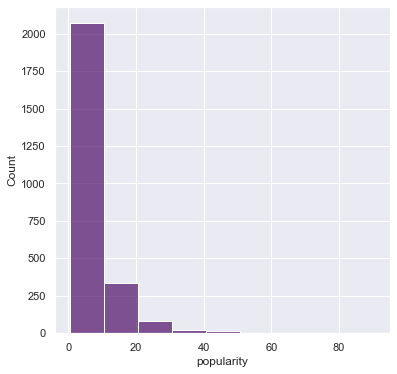

In [28]:
# Popularity scores are heavily weighted to the left

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes("dark")
sns.histplot(action_movies['popularity'], binwidth=10, color="m");

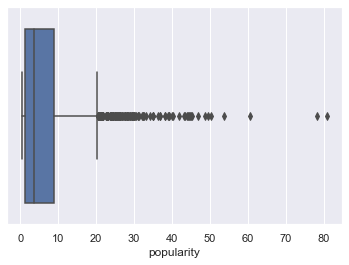

In [29]:
# Another view of the popularity distribution of 'Action' movies
ax = sns.boxplot(x=action_movies['popularity'])

In [30]:
# Now lets calulate the average popularity over each genre.
average_action_popularity = clean_tmdb_movies_df[clean_tmdb_movies_df['action'] == 1]['popularity'].mean()
genres = pd.Series(clean_tmdb_movies_df.columns[10:])
means=[]
for genre in genres:
     means.append(clean_tmdb_movies_df[clean_tmdb_movies_df[genre] == 1]['popularity'].mean())
data = pd.Series(means)
genre_means = (pd.concat([genres,data], axis=1))
genre_means.columns = ['genre','mean']
sorted_genre_means = genre_means.sort_values('mean', ascending=False)
sorted_genre_means.reset_index(drop=True,inplace=True)
sorted_genre_means

,genre,mean
0,adventure,7.319163
1,action,6.341359
2,fantasy,6.180947
3,crime,5.350936
4,war,5.135217
5,scifi,5.077950
6,thriller,4.765809
7,mystery,4.690565
8,family,4.585285
9,animation,4.417101


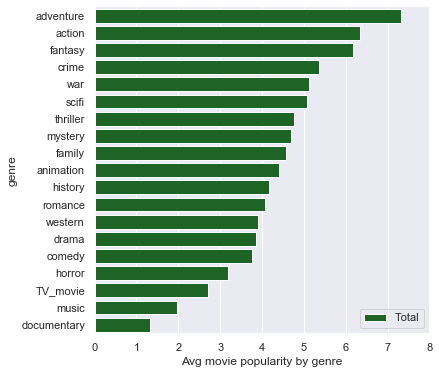

In [31]:
#  Well we see that the average popularity of adventure movies is the highest.  Let's look at a data visualization.

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes("dark")
sns.barplot(x="mean", y="genre", data=sorted_genre_means,
            label="Total", color="g")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 8), ylabel="genre",
       xlabel="Avg movie popularity by genre")
sns.despine(left=True, bottom=True)

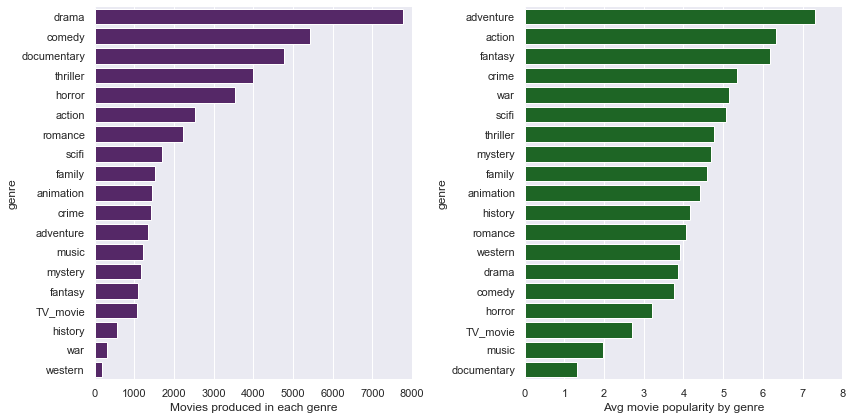

In [32]:
# Let's see if we can get these plots side-by-side.

f, axes = plt.subplots(1, 2, figsize=(12,6))

sns.barplot(x="count", y="genre", data=sorted_genre_counts, color="m", ax=axes[0])
axes[0].set(xlim=(0, 8000), ylabel="genre", xlabel="Movies produced in each genre")

sns.barplot(x="mean", y="genre", data=sorted_genre_means, color="g", ax=axes[1])
axes[1].set(xlim=(0, 8), ylabel="genre", xlabel="Avg movie popularity by genre")

sns.despine(left=True, bottom=True)
# plt.setp(axes, yticks=[])
plt.tight_layout()
plt.savefig('../images/popularity.png')

## Conclusion:

The top three movie genres produced during the time period of this dataset are Drama, Comedy, and Documentary.  But, if the popularity attribute is to be believed, people prefer the movie genres of Adventure, Action, and Fantasy.  I would like to compare actual box office gross to these figures to see if popularity actually results in higher gross.  But if we assume it does, then Microsoft should consider producing Adventure, Action, and Fantasy films.  We should also consider analyzing if movie genre popularity had been changing over time.